In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

images_folder = r"C:\Users\ilaki\Desktop\INTERNSHIPS\INFOSYS\val2017\val2017"
masks_folder  = r"C:\Users\ilaki\Desktop\INTERNSHIPS\INFOSYS\Masks\Converted"
binary_masks_folder = r"C:\Users\ilaki\Desktop\INTERNSHIPS\INFOSYS\BinaryMasks"

os.makedirs(binary_masks_folder, exist_ok=True)

target_size = (256, 256)


In [2]:
all_images = sorted(os.listdir(images_folder))
all_masks = sorted(os.listdir(masks_folder))

images_with_masks = []
for img_name in all_images:
    base_name = os.path.splitext(img_name)[0]
    matched_mask = None
    for mask_name in all_masks:
        if base_name in mask_name:
            matched_mask = mask_name
            break
    if matched_mask:
        images_with_masks.append((img_name, matched_mask))

print(f"Found {len(images_with_masks)} images with masks.")


Found 11 images with masks.


In [3]:
for img_name, mask_name in images_with_masks:
    mask_path = os.path.join(masks_folder, mask_name)
    
    mask = Image.open(mask_path).resize(target_size)
    mask_np = np.array(mask)
    
    # Convert to binary: any non-zero pixel becomes 1
    binary_mask_np = np.where(mask_np > 0, 1, 0).astype(np.uint8)
    
    # Save binary mask as PNG
    save_path = os.path.join(binary_masks_folder, img_name.replace('.jpg', '_binary.png'))
    Image.fromarray(binary_mask_np*255).save(save_path)


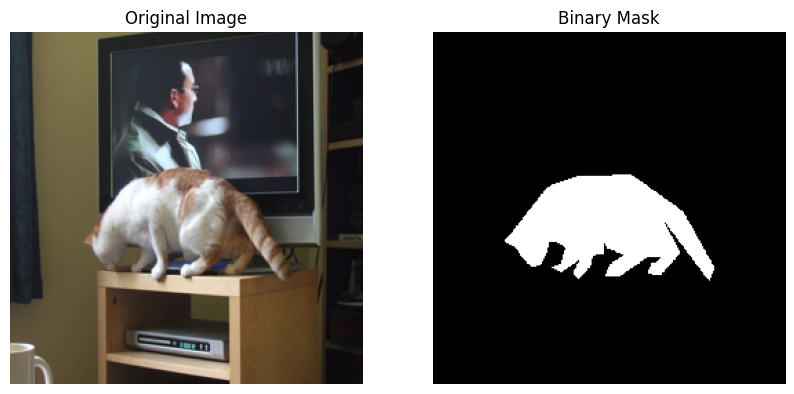

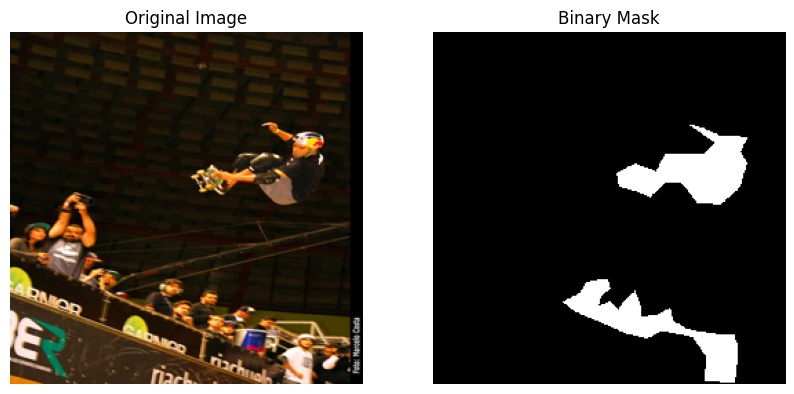

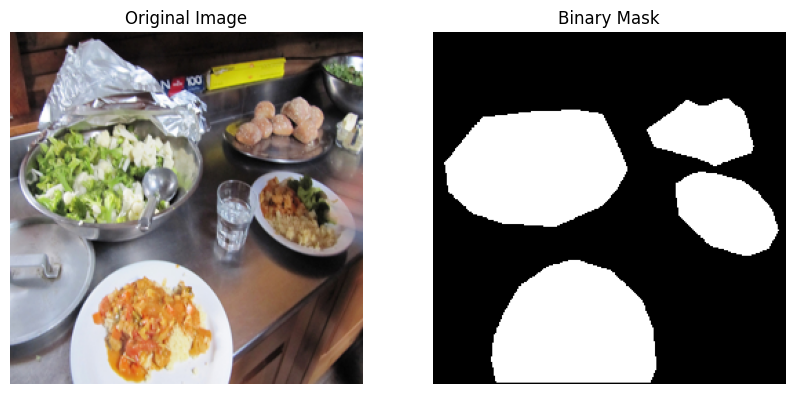

In [4]:
import random

samples = random.sample(images_with_masks, 3)

for img_name, mask_name in samples:
    img_path = os.path.join(images_folder, img_name)
    binary_mask_path = os.path.join(binary_masks_folder, img_name.replace('.jpg', '_binary.png'))
    
    image = Image.open(img_path).resize(target_size)
    binary_mask = Image.open(binary_mask_path)
    
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis('off')
    
    ax[1].imshow(binary_mask, cmap='gray')
    ax[1].set_title("Binary Mask")
    ax[1].axis('off')
    
    plt.show()
